<a href="https://colab.research.google.com/github/ayush9304/NetflixMoviesAndTVShowsClustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Ayush Kumar**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering](https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [227]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

!pip install contractions
import contractions

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud, STOPWORDS

from collections import Counter
import itertools
import string

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [3]:
# Load Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ayush9304/NetflixMoviesAndTVShowsClustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

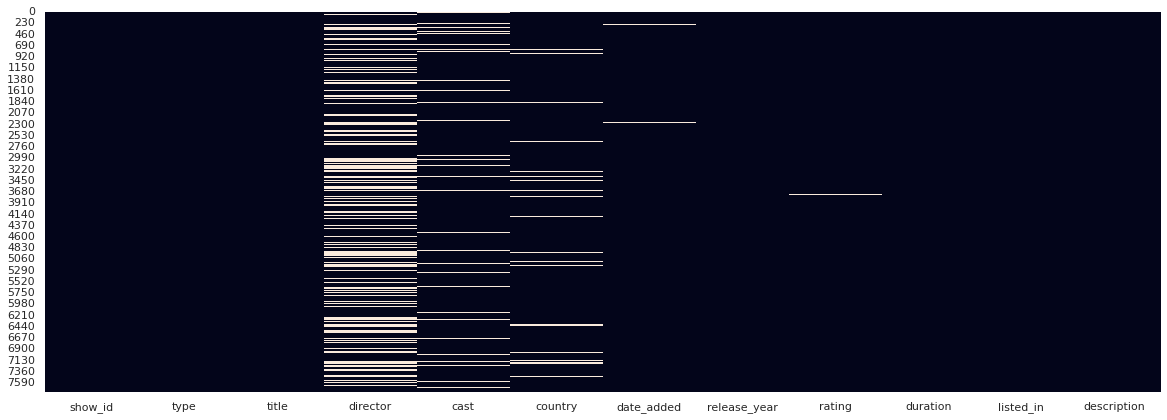

In [9]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. It contains informations like title, director, cast, country, release_year, rating, duration	etc.

It has 7787 rows and 12 columns in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* **show_id:** Unique ID for every Movie/TV Show
* **type:** Identifier - Movie or TV Show
* **title:** Title of the Movie/TV Show
* **director:** Director of the show
* **cast:** Actors involved
* **country:** Country of production
* **date_added:** Date it was added on Netflix
* **release_year:** Actual Release year of the show
* **rating:** TV Rating of the show
* **duration:** Total Duration in minutes or number of seasons
* **listed_in:** Genre
* **description:** The summary description

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [124]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [118]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [125]:
# Checking different format types of duration for TV Shows and Movies
import re

# Define regular expression patterns for TV show and movie durations
tvshow_pattern = r'^\d+ (Season|Seasons)$$'
movie_pattern = r'^\d+ min$'

# Check if all TV show durations match the pattern
tvshow_durations = df[df['type'] == 'TV Show']['duration']
tvshow_matches = all(tvshow_durations.str.match(tvshow_pattern))
print("All TV shows have durations in the format of n Seasons: ", tvshow_matches)

# Check if all movie durations match the pattern
movie_durations = df[df['type'] == 'Movie']['duration']
movie_matches = all(movie_durations.str.match(movie_pattern))
print("All movies have durations in the format of n minutes: ", movie_matches)


All TV shows have durations in the format of n Seasons:  True
All movies have durations in the format of n minutes:  True


In [126]:
# Getting number(digit) from duration column for EDA
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [127]:
df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [128]:
#splitting listed_in into genre list
df['genres'] = df['listed_in'].apply(lambda x :  x.split(', '))

In [129]:
df['country'].tail()

7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, dtype: object

In [130]:
#splitting country into country list
df.loc[~df.country.isna(), 'country_list'] = df[~df.country.isna()]['country'].apply(lambda x :  x.split(', '))

In [131]:
df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [132]:
#splitting cast into actors list
df['actors'] = df['cast'].str.split(', ')

In [133]:
df['date_added'].head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [134]:
# Converting date_added from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Creating new columns month and year of date_added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 0.98, 'Distribution of Movies and TV Shows')

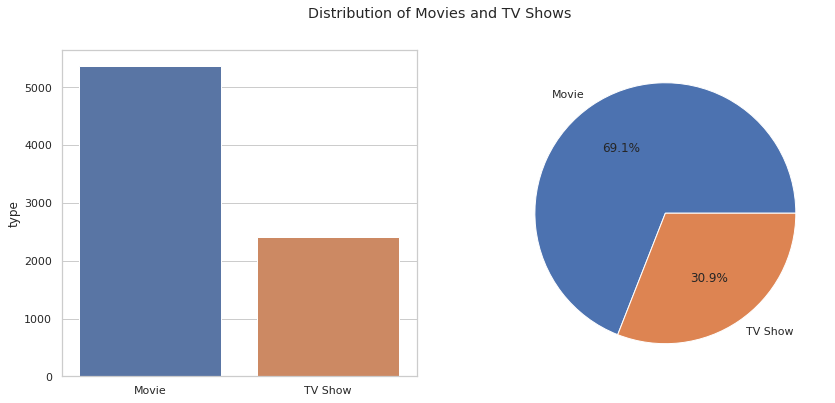

In [26]:
d = df['type'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")
plt.suptitle('Distribution of Movies and TV Shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Line Chart - Movies/Shows by year

Text(0, 0.5, 'Count')

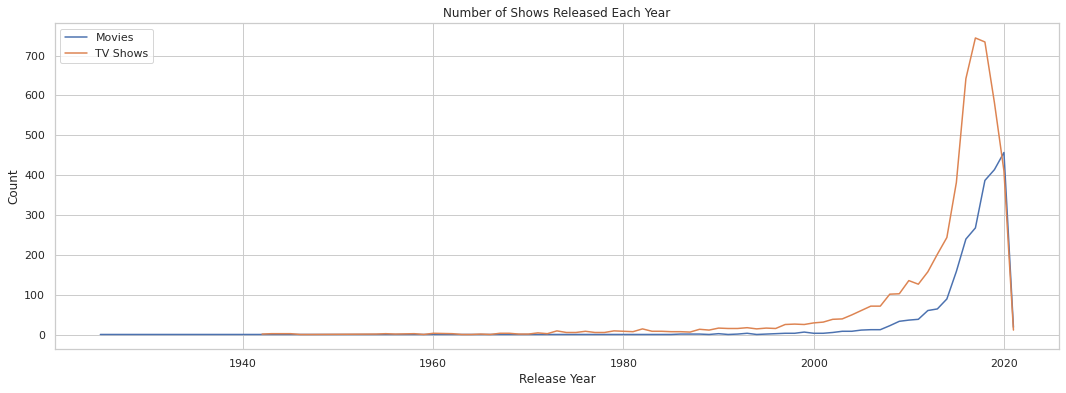

In [27]:
yearly_movies_count = df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False)
yearly_shows_count = df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(18,6))
sns.lineplot(x=yearly_movies_count.index, y=yearly_movies_count, label='Movies')
sns.lineplot(x=yearly_shows_count.index, y=yearly_shows_count, label='TV Shows')
plt.title('Number of Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Countries with highest number of Shows/Movies

Text(0.5, 0.98, 'Top Countries with the Highest Number of TV Shows and Movies')

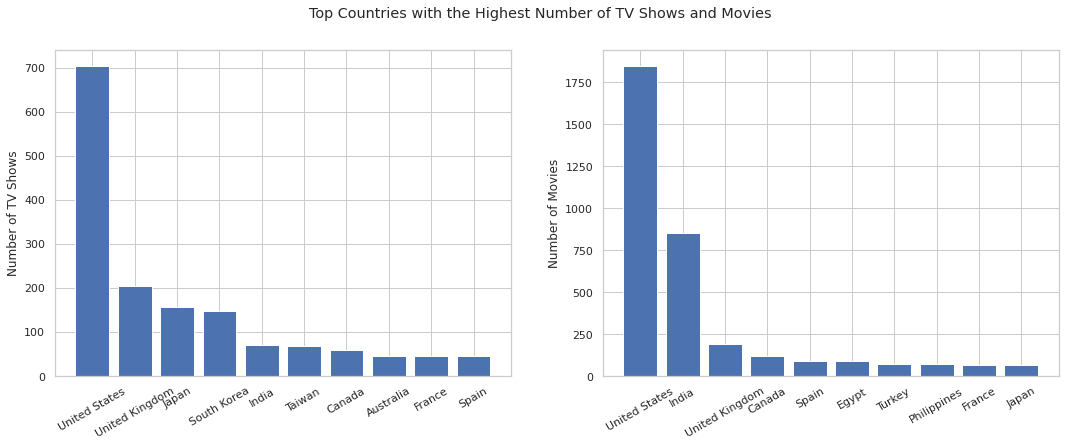

In [29]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['country', 'type']).size().reset_index(name='count')

d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['country'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['country'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top Countries with the Highest Number of TV Shows and Movies')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Top Ratings for Movies/Shows

Text(0.5, 0.98, 'Top movie and shows by ratings')

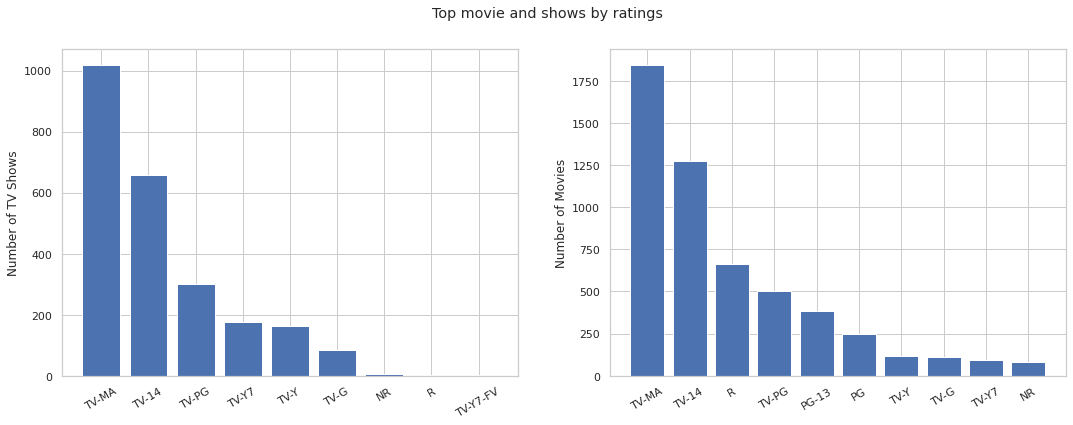

In [30]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['type', 'rating']).size().reset_index(name='count')

d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['rating'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['rating'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top movie and shows by ratings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Top Genres

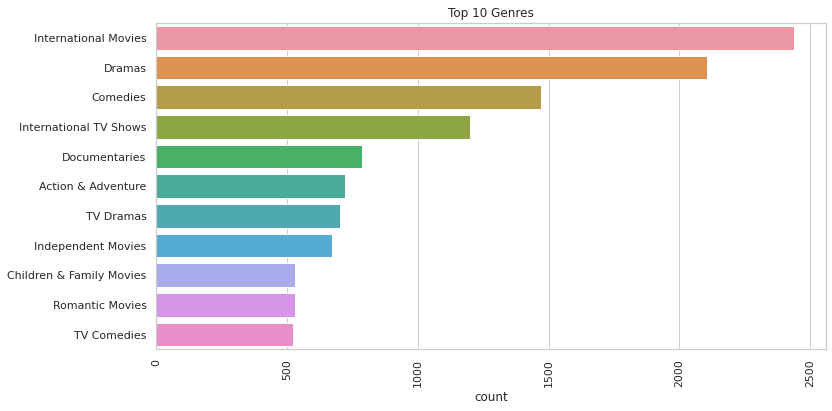

In [31]:
#Top 10 genres plot
genres = []
#count genre for each movies and shows
for i in df['genres']: 
  genres += i

cnts = Counter(genres)
genre_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_genre_count = pd.DataFrame(genre_dict.values(), index=genre_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(y=df_genre_count.index, x=df_genre_count['count'])
plt.title("Top 10 Genres")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Top Directors for Movies/Shows

Text(0.5, 1.0, 'Top TV Shows directors')

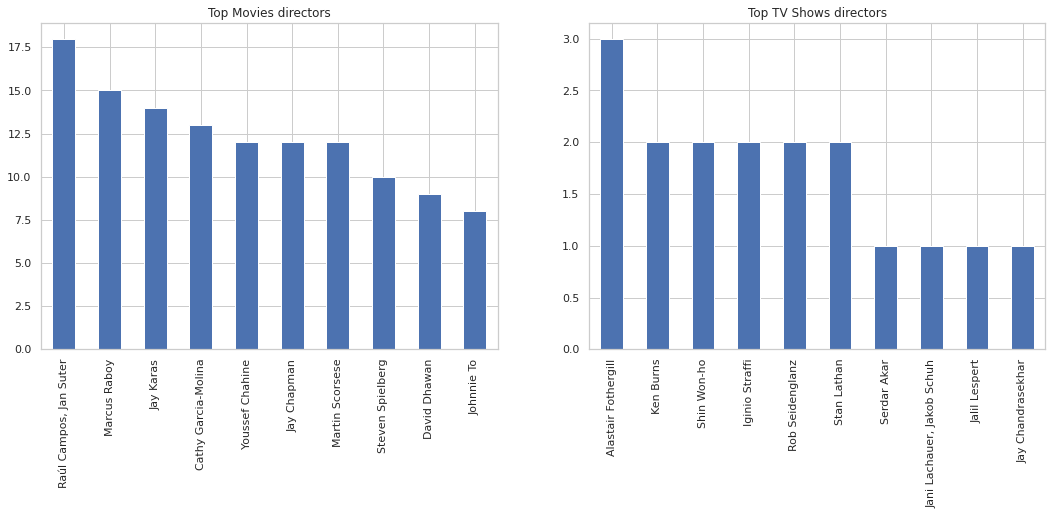

In [36]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='bar')
plt.title('Top Movies directors')

plt.subplot(1,2,2)
# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='bar')
plt.title('Top TV Shows directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Top Actors

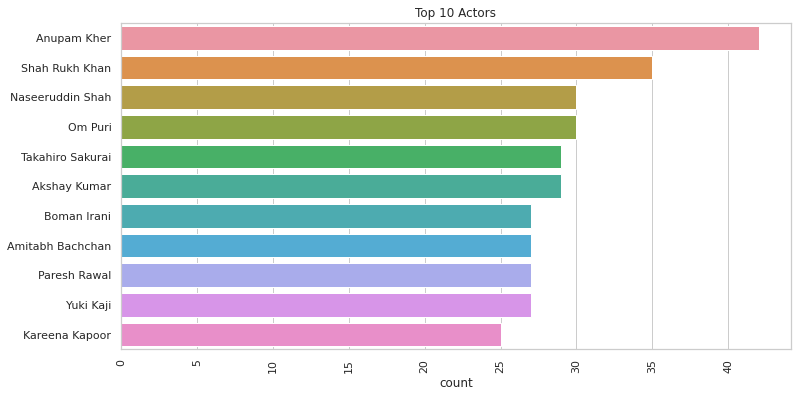

In [35]:
#Top 10 actors plot
actors = []
#count movies for each actor
for i in df['actors'].dropna():
  actors += i
    
lsts = list(df['actors'].dropna())
cnts = Counter(list(itertools.chain(*lsts)))
actor_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_actor_count = pd.DataFrame(actor_dict.values(), index=actor_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(y=df_actor_count.index, x=df_actor_count['count'])
plt.title("Top 10 Actors")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Movie Duration distribution

Text(0.5, 0, 'Minutes')

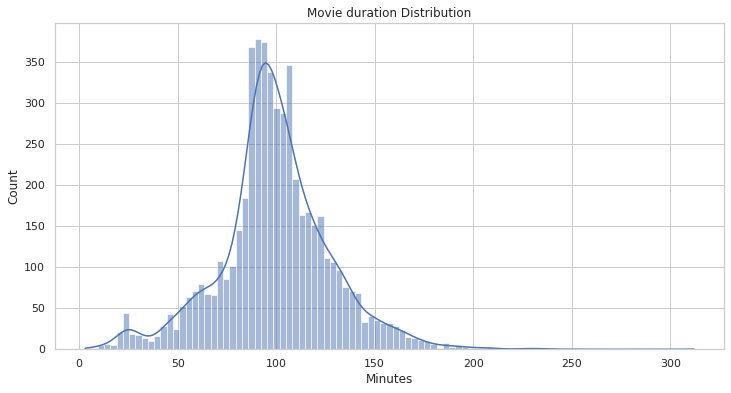

In [88]:
# Movie duration Distribution
plt.figure(figsize=(12,6))
sns.histplot(x='duration', data=df[df['type']=='Movie'], kde=True)
plt.title('Movie duration Distribution')
plt.xlabel('Minutes')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - TV Shows duration distributions

Text(0.5, 0, 'Seasons')

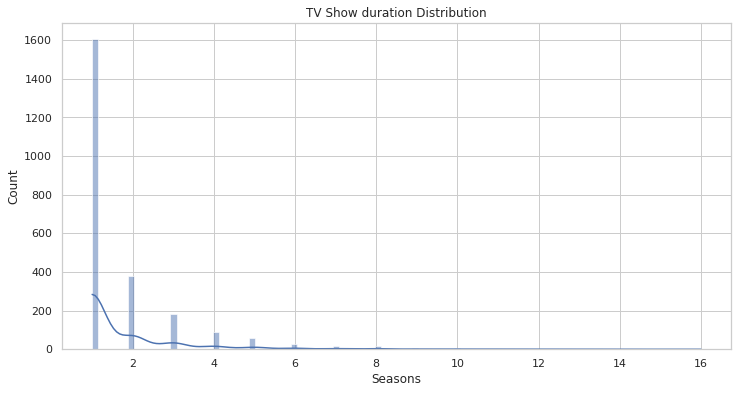

In [89]:
# TV Show duration Distribution
plt.figure(figsize=(12,6))
sns.histplot(x='duration', data=df[df['type']=='TV Show'], kde=True)
plt.title('TV Show duration Distribution')
plt.xlabel('Seasons')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Avg Movie Duration over the years

Text(0.5, 0, 'Year')

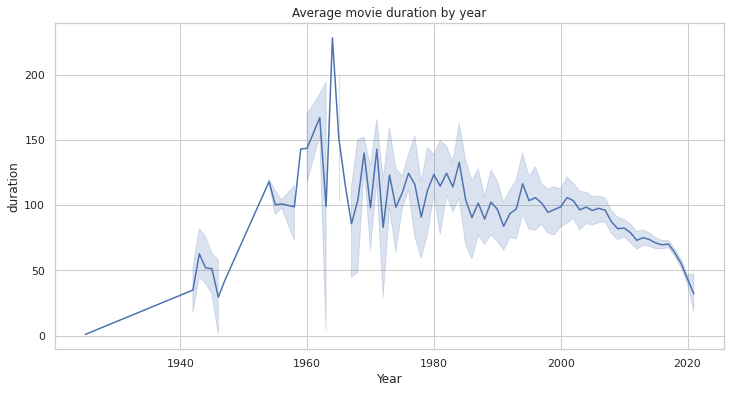

In [86]:
# Average movie duration by years
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='duration', data=df)
plt.title('Average movie duration by year')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Movies/TV Shows by months of the year

Text(0.5, 1.0, 'TV Shows/Movies added each month over the years')

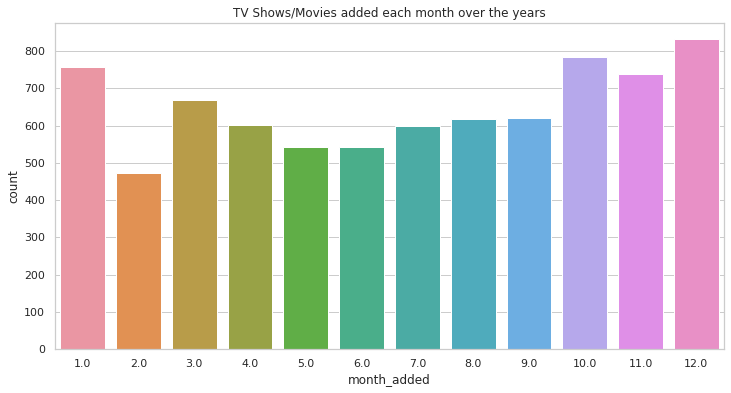

In [32]:
# Number of shows added by months
plt.figure(figsize = (12,6))
sns.countplot(x=df['month_added'])
plt.title('TV Shows/Movies added each month over the years')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Top countries by content type

Text(0.5, 1.0, 'Top countries content type')

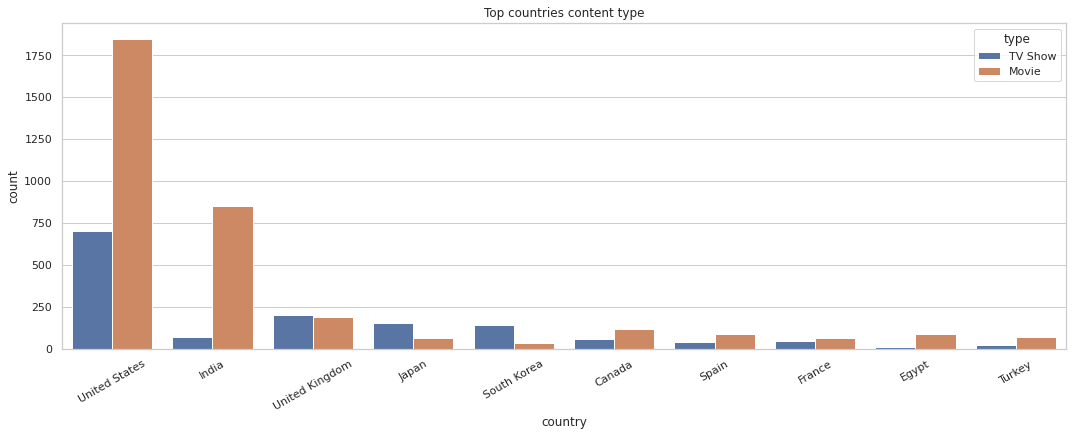

In [95]:
# Top countries content type 
plt.figure(figsize=(18,6))
sns.countplot(x=df['country'] ,order=df['country'].value_counts().index[0:10], hue=df['type'])
plt.xticks(rotation=30)
plt.title('Top countries content type')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Number of Movies by Ratings over the Years

Text(0.5, 0.98, 'Number of Movies by Ratings over the Years')

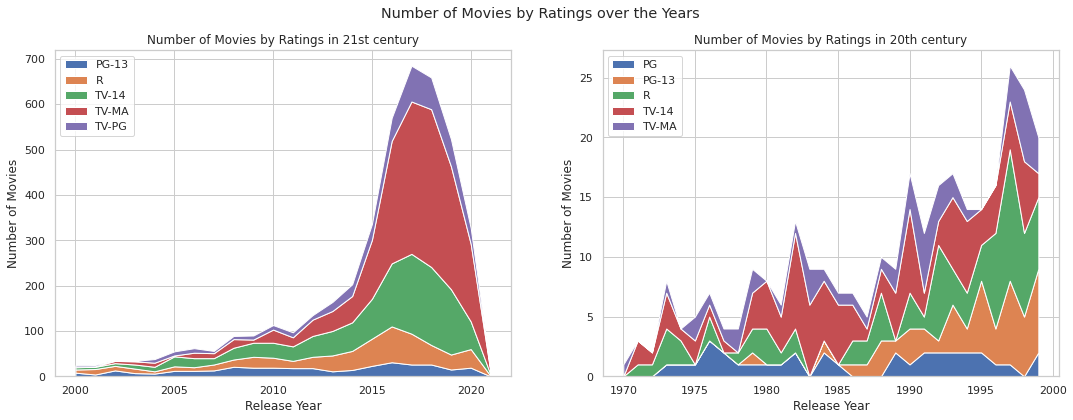

In [33]:
#Trend of number of movies by ratings over the years
# Filter only movies
movies_21st = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)]
movies_20th = df[(df['type'] == 'Movie') & (df['release_year'] < 2000) & (df['release_year'] >=1970)]

# Group by rating and release year, and count the number of movies
movies_by_rating_year_21st = movies_21st.groupby(['rating', 'release_year']).size().reset_index(name='count')
movies_by_rating_year_20th = movies_20th.groupby(['rating', 'release_year']).size().reset_index(name='count')

# Select the top 5 rating categories by the total count of movies
top_ratings_21st = movies_by_rating_year_21st.groupby('rating').sum().sort_values(by='count', ascending=False).head(5).index
top_ratings_20th = movies_by_rating_year_20th.groupby('rating').sum().sort_values(by='count', ascending=False).head(5).index
movies_by_rating_year_top_21st = movies_by_rating_year_21st[movies_by_rating_year_21st['rating'].isin(top_ratings_21st)]
movies_by_rating_year_top_20th = movies_by_rating_year_20th[movies_by_rating_year_20th['rating'].isin(top_ratings_20th)]

# Pivot the table to have ratings as columns and release year as index
movies_by_rating_year_pivot_21st = movies_by_rating_year_top_21st.pivot(index='release_year', columns='rating', values='count').fillna(0)
movies_by_rating_year_pivot_20th = movies_by_rating_year_top_20th.pivot(index='release_year', columns='rating', values='count').fillna(0)

# Plot the area plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.stackplot(movies_by_rating_year_pivot_21st.index, movies_by_rating_year_pivot_21st.values.T, labels=movies_by_rating_year_pivot_21st.columns)
plt.legend(loc='upper left')
plt.title('Number of Movies by Ratings in 21st century')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.subplot(1,2,2)
plt.stackplot(movies_by_rating_year_pivot_20th.index, movies_by_rating_year_pivot_20th.values.T, labels=movies_by_rating_year_pivot_20th.columns)
plt.legend(loc='upper left')
plt.title('Number of Movies by Ratings in 20th century')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.suptitle("Number of Movies by Ratings over the Years")


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Countries with highest avg movie duration

Text(0.5, 1.0, 'Average movies duration by country')

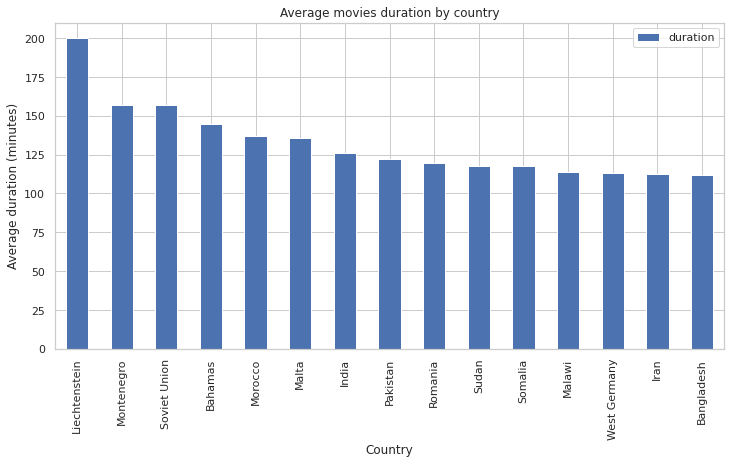

In [202]:
# create a new dataframe with exploded countries
df_countries = df.explode('country_list')

# filter only movies
df_movies = df_countries[df_countries['type'] == 'Movie']

# group by country and calculate mean duration
df_duration = df_movies.groupby('country_list')['duration'].mean().reset_index()

# sort by duration
df_duration = df_duration.sort_values(by='duration', ascending=False).head(15)

# plot the bar chart
ax = df_duration.plot.bar(x='country_list', y='duration', figsize=(12,6))
ax.set_xlabel('Country')
ax.set_ylabel('Average duration (minutes)')
ax.set_title('Average movies duration by country')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average duration of movies has decreased in the 21st century.
2. The proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade.
3. There is a significant difference in the average duration of movies released in the United States compared to those released in India.

### Hypothetical Statement - 1

The average duration of movies has decreased in the 21st century.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The average duration of movies in 21st century is the same as average duration of movies in 20th century.

**Alternative Hypothesis:** The average duration of movies in 21st century is lower than the average duration of movies in 20th century.

**Test Type:** one-tailed one-sample t-test

#### 2. Perform an appropriate statistical test.

In [34]:
# Subset to only include movies
movies_df = df[df["type"] == "Movie"]

# Split into 20th and 21st century data
movies_20th = movies_df[movies_df["release_year"] < 2000]
movies_21st = movies_df[movies_df["release_year"] >= 2000]

# Calculate mean durations
mean_20th = np.mean(movies_20th["duration"])
mean_21st = np.mean(movies_21st["duration"])

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(movies_21st["duration"], mean_20th)

# Print the results
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, The average duration of movies has decreased in the 21st century.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The average duration of movies has not decreased in the 21st century.")


P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, The average duration of movies has decreased in the 21st century.


##### Which statistical test have you done to obtain P-Value?

I have used one-tailed one-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the average duration of movies has decreased in the 21st century.

##### Why did you choose the specific statistical test?

I used a one-tailed, one-sample t-test to compare the mean duration of movies in the 21st century to the mean duration of movies in the 20th century. 

### Hypothetical Statement - 2

The proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** The proportion of movies with a rating of 'TV-MA' has remained constant in the last decade.

**Alternate hypothesis:** The proportion of movies with a rating of 'TV-MA' has increased in the last decade.

**Test Type:** one-sample z-test for proportion

#### 2. Perform an appropriate statistical test.

In [35]:
# Filter for movies released in the last decade (2011-2021)
recent_movies = df[(df['type'] == 'Movie') & (df['release_year'] >= 2011)]

# Calculate the proportion of movies with an 'R' rating in last decade
r_proportion = len(recent_movies[recent_movies['rating'] == 'TV-MA']) / len(recent_movies)

# Overall historical proportion of movies with an 'R' rating
overall_proportion = len(df[df['rating'] == 'TV-MA']) / len(df)

# Perform a one-sample proportion test
z_score, p_val = proportions_ztest(r_proportion * len(recent_movies), len(recent_movies), overall_proportion)

# Print the results
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("The proportion of movies with a rating of 'TV-MA' has increased in the last decade.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, The proportion of movies with a rating of 'TV-MA' has remained same in the last decade.")

P-value: 3.5336533533348024e-05

Since p-value (3.5336533533348024e-05) is less than 0.05, we reject null hypothesis.
The proportion of movies with a rating of 'TV-MA' has increased in the last decade.


##### Which statistical test have you done to obtain P-Value?

I have used one-sample proportion z-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the proportion of movies with a rating of 'R' has increased in the last decade.

##### Why did you choose the specific statistical test?

To test this hypothesis, we can use a one-sample z-test for proportion. We would compare the proportion of movies with an 'R' rating in the last decade to the proportion of movies with an 'R' rating in the entire dataset.

### Hypothetical Statement - 3

There is a significant difference in the average duration of movies released in the United States compared to those released in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant difference in the average duration of movies released in the United States compared to those released in India.

**Alternate Hypothesis:** There is a significant difference in the average duration of movies released in the United States compared to those released in India.

**Test Type:** two-sample t-test

#### 2. Perform an appropriate statistical test.

In [36]:
# Create a new dataframe with one row per country since some movies are released in multiple countries
d = df[df['type']=='Movie'].explode('country_list')

# Subset data for movies released in the US and India
us_movies = d[d['country_list'] == 'United States']['duration']
india_movies = d[d['country_list'] == 'India']['duration']

# Perform t-test
t_stats, p_val = ttest_ind(us_movies, india_movies, equal_var=True)

# Print the results
print("Average movie duration in India:", round(india_movies.mean(), 1), "mins")
print("Average movie duration in USA:", round(us_movies.mean(), 1), "mins")
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("There is a significant difference in the average duration of movies released in the United States compared to those released in India.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, There is no significant difference in the average duration of movies released in the United States compared to those released in India.")

Average movie duration in India: 126.3 mins
Average movie duration in USA: 92.4 mins
P-value: 6.335181559401942e-221

Since p-value (6.335181559401942e-221) is less than 0.05, we reject null hypothesis.
There is a significant difference in the average duration of movies released in the United States compared to those released in India.


##### Which statistical test have you done to obtain P-Value?

I have used two-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and there is a significant difference in the average duration of movies released in the United States compared to those released in India..

##### Why did you choose the specific statistical test?

The reason for using a two-sample t-test is that we have two independent samples (movies released in the US and movies released in India), and we want to compare the means of these two samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [136]:
# Get count and percentage of missing values for each column
missing_count = df.isna().sum()
missing_percent = df.isna().sum()/len(df)*100

# Combine count and sum into a single dataframe
missing_df = pd.concat([missing_count, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
director,2389,30.679337
cast,718,9.220496
actors,718,9.220496
country_list,507,6.510851
country,507,6.510851
year_added,10,0.128419
month_added,10,0.128419
date_added,10,0.128419
rating,7,0.089893
duration,0,0.000000


* Director column as most missing values (around 30%) and it is categorical variable. We cannot use mode here because number of missing values is large and hence will create new 'Unknown' category to replace missing values.
* For cast and country columns, number of missing values are not that high but still not negeligible so imputing it same way as director column.
* Out of more than 7000 rows only 10 rows have missing values in date_added column, and I can't use mode in date field as it will not appropriate so I will drop it.
* In case of  rating column, it is a categorical variable so will use mode.

In [140]:
# Handling the missing values
df[['director','cast','country','country_list','actors']] = df[['director','cast','country','country_list','actors']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(subset=['date_added'], inplace=True)

In [141]:
# checking for null values after treating them.
df.isna().sum().sort_values(ascending=False)

show_id         0
duration        0
month_added     0
actors          0
country_list    0
genres          0
description     0
listed_in       0
rating          0
type            0
release_year    0
date_added      0
country         0
cast            0
director        0
title           0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [143]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,country_list,actors,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[International TV Shows, TV Dramas, TV Sci-Fi ...",[Brazil],"[João Miguel, Bianca Comparato, Michel Gomes, ...",8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Dramas, International Movies]",[Mexico],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",12.0,2016.0


<Axes: xlabel='release_year'>

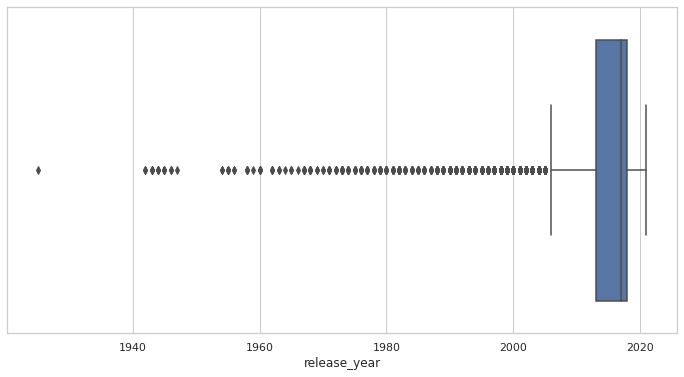

In [146]:
# Checking for Outliers in release_year column
plt.figure(figsize=(12,6))
sns.boxplot(x=df['release_year'])

In [157]:
# Checking percentage of data as outlier
Q1 = df.release_year.quantile(0.25)
Q3 = df.release_year.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 3*IQR

p = df[df['release_year']<lower_fence].shape[0] / len(df)
print("Lower Fence: ", lower_fence)
print("percentage of values below lower fence:", round(p*100, 2), "%")

Lower Fence:  1998.0
percentage of values below lower fence: 4.95 %


Since all the outliers are movies released before 1998, I can consider those movies as "old movies" and assign them a single value such as 1970 or 1980 so that one category of movie (old movie) will have quite number of movies and not too far from rest of data.

Old Movies release year: 1987.0


<Axes: xlabel='release_year', ylabel='Count'>

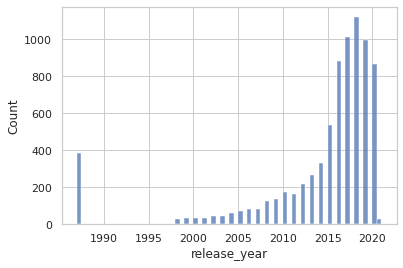

In [180]:
# Replacing outliers with median of old movies
# d = df['release_year'].copy()
old = df[df['release_year']<1998]['release_year'].median()
df['release_year'] = np.where(d<1998, old, df['release_year'])
print("Old Movies release year:", old)
sns.histplot(x=df['release_year'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [181]:
df2 = df.copy()

#### 1. Expand Contraction

In [182]:
# Function to apply contraction expansion to a string
def expand_contractions(text):
    return contractions.fix(text)

In [183]:
# Apply contraction expansion to the description column
df2['description'] = df2['description'].apply(expand_contractions)

In [200]:
# Concatenating all important text columns for text preprocessing
df2['movie_data'] = df['director'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [201]:
df2['movie_data'][1]

'Jorge Michel Grau Mexico TV-MA Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 2. Lower Casing

In [202]:
df2['movie_data'] = df2['movie_data'].str.lower()

#### 3. Removing Punctuations

In [203]:
# Function to remove all punctuations from text
# got list of punctuations from string library
def remove_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [210]:
df2['movie_data'] = df2['movie_data'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [214]:
def remove_urls(text):
  text = re.sub(r'http\S+|www\S+', '', text)
  return text

In [216]:
df2['movie_data'] = df2['movie_data'].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [218]:
# Fuction to removing stopwords
def remove_stopwords(text):
    # Getting words from text
    words = nltk.word_tokenize(text)
    # Removing english stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into sentence
    text = ' '.join(words)
    return text

In [219]:
# Function to remove extra whitespaces
def remove_whitespaces(text):
    # Replace all sequences of whitespace characters with a single space
    text = re.sub('\s+', ' ', text)
    # Remove any leading or trailing whitespace
    text = text.strip()
    return text

In [223]:
df2['movie_data'] = df2['movie_data'].apply(remove_stopwords)
df2['movie_data'] = df2['movie_data'].apply(remove_whitespaces)

In [226]:
df2['movie_data'][1]

'jorge michel grau mexico tvma demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

#### 6. Tokenization

In [ ]:
# Tokenization

#### 7. Text Normalization

In [228]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):
    token_words = nltk.word_tokenize(sentence)
    lem_sentence = [lemmatizer.lemmatize(word, pos='v') for word in token_words]
    lem_sentence = ' '.join(lem_sentence)
    return lem_sentence

In [237]:
# Apply lemmatization on movie_data column
df2['movie_data'] = df2['movie_data'].apply(lemmatize_sentence)

In [239]:
df2['movie_data'][1]

'jorge michel grau mexico tvma demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastate earthquake hit mexico city trap survivors walk life wait rescue try desperately stay alive'

##### Which text normalization technique have you used and why?

Answer Here.

#### 8. Text Vectorization

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***